In [1659]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem , t 
import stemgraphic
import random
import math

In [1660]:
df = pd.read_csv("merged_data_cleaned.csv",encoding="utf-8")
# 1.altitude_mean_meters
# 2.Species
# 3.Processing.Method
# 4.Region
# 5.Total.Cup.Points
df.dropna(subset = ["altitude_mean_meters"], inplace=True)
df['Country.of.Origin'][df['Country.of.Origin'].isna()] = 'Unknown'



C:\Users\witta\AppData\Local\Temp/ipykernel_12056/3482892442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country.of.Origin'][df['Country.of.Origin'].isna()] = 'Unknown'


In [1661]:
df.describe()

,Unnamed: 0,altitude_mean_meters,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects
count,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1105.000000,1106.000000
mean,669.899638,1328.013123,7.578002,7.527604,7.401311,7.535714,7.513382,7.512559,9.876555,9.860072,9.882450,7.495678,82.183580,0.091980,0.367993,0.139367,3.528933
std,381.077935,486.487007,0.308928,0.330967,0.339747,0.312954,0.289186,0.353711,0.429018,0.725699,0.523281,0.413252,2.627747,0.045533,1.850823,0.725155,5.262999
min,0.000000,1.000000,5.080000,6.170000,6.170000,5.250000,5.170000,5.250000,6.000000,0.000000,1.330000,5.170000,59.830000,0.000000,0.000000,0.000000,0.000000
25%,340.250000,1100.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.170000,0.100000,0.000000,0.000000,0.000000
50%,674.500000,1310.640000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000
75%,991.750000,1600.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.580000,0.120000,0.000000,0.000000,4.000000
max,1336.000000,4287.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.200000,31.000000,11.000000,47.000000


Mean ของความสูงที่ใช้ปลูกกาแฟ = 1775.030545	เมตร
Mean ของคะแนนเฉลี่ย = 82.109594	คะแนน

C:\Users\witta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\witta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Height')

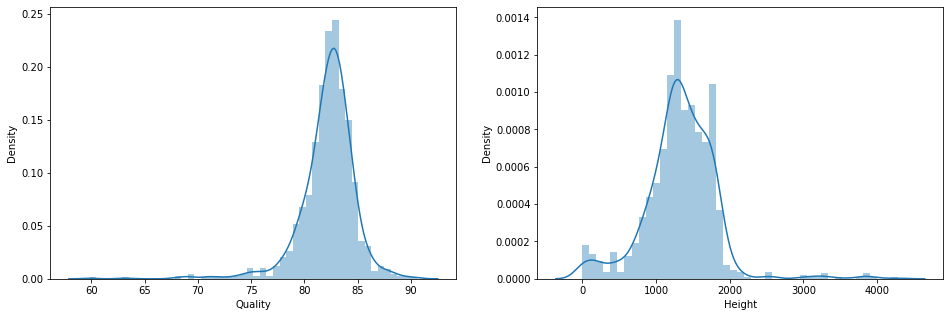

In [1662]:
altitude_series = df.loc[:,'altitude_mean_meters']
point = df.loc[:,'Total.Cup.Points']
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(a=point)
plt.xlabel("Quality")
plt.subplot(1,2,2)
sns.distplot(a=altitude_series)
plt.xlabel("Height")

จะเห็นได้ว่ากราฟ distribution ยังมี Outlier ที่เยอะมากอยู่ จึงต้องลบทิ้ง

In [1663]:
print("Highest height allowed",altitude_series.mean() + 3*altitude_series.std())
print("Lowest height allowed",altitude_series.mean() - 3*altitude_series.std())

print("Highest Quality allowed",point.mean() + 3*point.std())
print("Lowest Quality allowed",point.mean() - 3*point.std())

Highest height allowed 2787.474144089573
Lowest height allowed -131.447897434962
Highest Quality allowed 90.06682065614615
Lowest Quality allowed 74.30034028417936


นี่คือขอบเขตข้อมูลของความสูง ถ้ามากกว่า 2787.474144089573 จะถือว่าเป็น outliers

Find Outliers

In [1664]:
df[(altitude_series> 2787.474144089573) | (altitude_series < -131.447897434962)]

,Unnamed: 0,Species,Country.of.Origin,Altitude,altitude_mean_meters,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects
215,215,Arabica,Guatemala,3280,3280.0,Washed / Wet,7.58,7.83,7.58,7.83,...,7.67,10.00,10.0,10.00,7.83,84.17,0.10,0,0.0,2
627,628,Arabica,Colombia,1800 meters (5900,3850.0,NaN,7.33,7.58,7.42,7.42,...,7.67,10.00,10.0,10.00,7.58,82.67,0.11,0,0.0,0
836,837,Arabica,Guatemala,3280,3280.0,Washed / Wet,7.58,7.50,7.33,7.42,...,7.25,10.00,10.0,10.00,7.17,81.83,0.10,2,0.0,6
839,840,Arabica,Myanmar,4001,4001.0,Washed / Wet,7.33,7.58,7.50,7.42,...,7.33,10.00,10.0,10.00,7.33,81.83,0.00,0,0.0,2
999,1001,Arabica,Guatemala,3280,3280.0,Washed / Wet,7.42,7.25,7.17,7.50,...,7.17,10.00,10.0,10.00,7.25,81.00,0.09,0,0.0,8
1036,1038,Arabica,Myanmar,3825,3825.0,Washed / Wet,6.92,7.50,7.00,7.58,...,7.08,10.00,10.0,10.00,7.17,80.75,0.00,0,0.0,2
1071,1073,Arabica,Myanmar,3800,3800.0,Washed / Wet,7.17,7.33,7.17,7.42,...,7.08,10.00,10.0,10.00,7.08,80.50,0.00,0,0.0,2
1096,1098,Arabica,Myanmar,4287,4287.0,Natural / Dry,7.42,7.00,7.08,7.00,...,7.33,10.00,10.0,10.00,7.25,80.25,0.00,0,0.0,1
1121,1123,Arabica,Myanmar,3845,3845.0,Washed / Wet,7.17,7.33,7.00,7.42,...,7.00,10.00,10.0,10.00,6.92,80.00,0.00,0,0.0,4
1267,1269,Arabica,Indonesia,3500,3500.0,Natural / Dry,7.33,7.00,6.50,6.08,...,6.33,9.33,10.0,9.33,6.67,76.17,0.12,4,0.0,26


สร้างชุดข้อมูลที่กำจัด Outliers ออกไปแล้ว

In [1665]:
new_df = df[(altitude_series < 2787.474144089573) & (altitude_series > -131.447897434962)
            & (point < 90.09512695261628) & (point > 74.29642982394051)]
new_df.describe()


,Unnamed: 0,altitude_mean_meters,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects
count,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1074.000000,1075.000000
mean,656.469767,1300.941576,7.587209,7.539265,7.413712,7.543767,7.519814,7.526540,9.895330,9.921767,9.913870,7.509814,82.371442,0.092381,0.358140,0.143389,3.439070
std,374.164429,419.288961,0.297584,0.314020,0.320668,0.300123,0.280413,0.334983,0.370103,0.416600,0.387479,0.397782,2.115744,0.045293,1.854361,0.735163,5.118954
min,1.000000,1.000000,5.080000,6.330000,6.330000,5.250000,5.170000,5.250000,6.670000,5.330000,6.670000,5.170000,74.330000,0.000000,0.000000,0.000000,0.000000
25%,332.500000,1100.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.330000,81.330000,0.100000,0.000000,0.000000,0.000000
50%,659.000000,1310.640000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000
75%,970.500000,1600.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000
max,1336.000000,2560.000000,8.750000,8.670000,8.580000,8.580000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,89.920000,0.200000,31.000000,11.000000,47.000000


C:\Users\witta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\witta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Height')

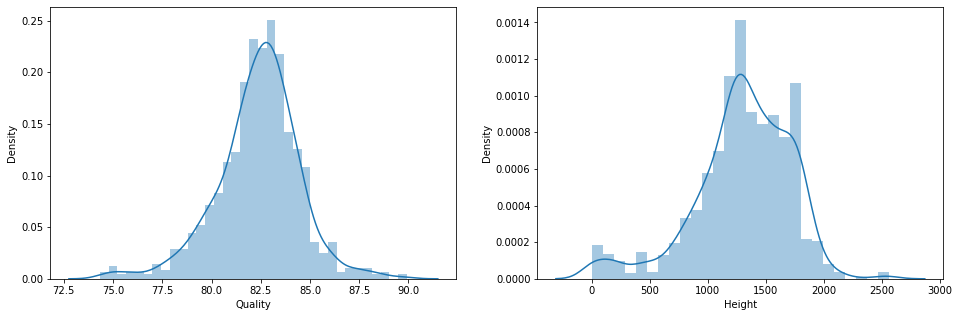

In [1666]:
altitude_series = new_df.loc[:,'altitude_mean_meters']
point = new_df.loc[:,'Total.Cup.Points']
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(a=point)
plt.xlabel("Quality")
plt.subplot(1,2,2)
sns.distplot(a=altitude_series)
plt.xlabel("Height")

Boxplot ของ Quality และ Height

Text(0.5, 0, 'Height')

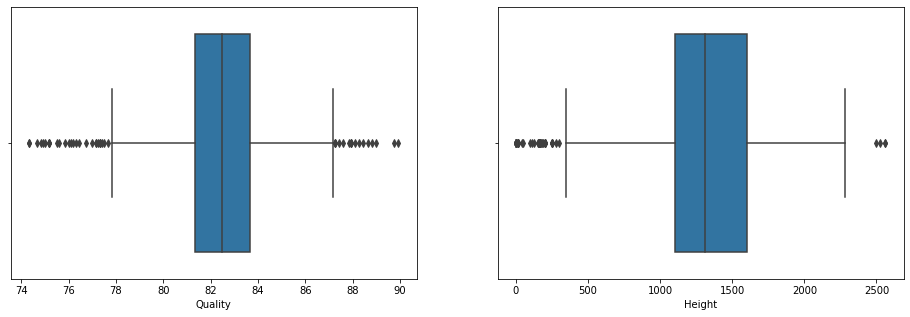

In [1667]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(x=point)
plt.xlabel("Quality")
plt.subplot(1,2,2)
sns.boxplot(x=altitude_series)
plt.xlabel("Height")

ทำ Scatter plot หาความสัมพันธ์ระหว่าง Quality กับ height

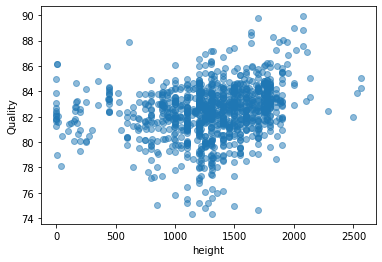

In [1668]:
plt.scatter(altitude_series, point, alpha=0.5)
plt.xlabel("height")
plt.ylabel("Quality")
plt.show()

C:\Users\witta\AppData\Local\Temp/ipykernel_12056/1461471250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['country']= new_df.loc[:,'Country.of.Origin']


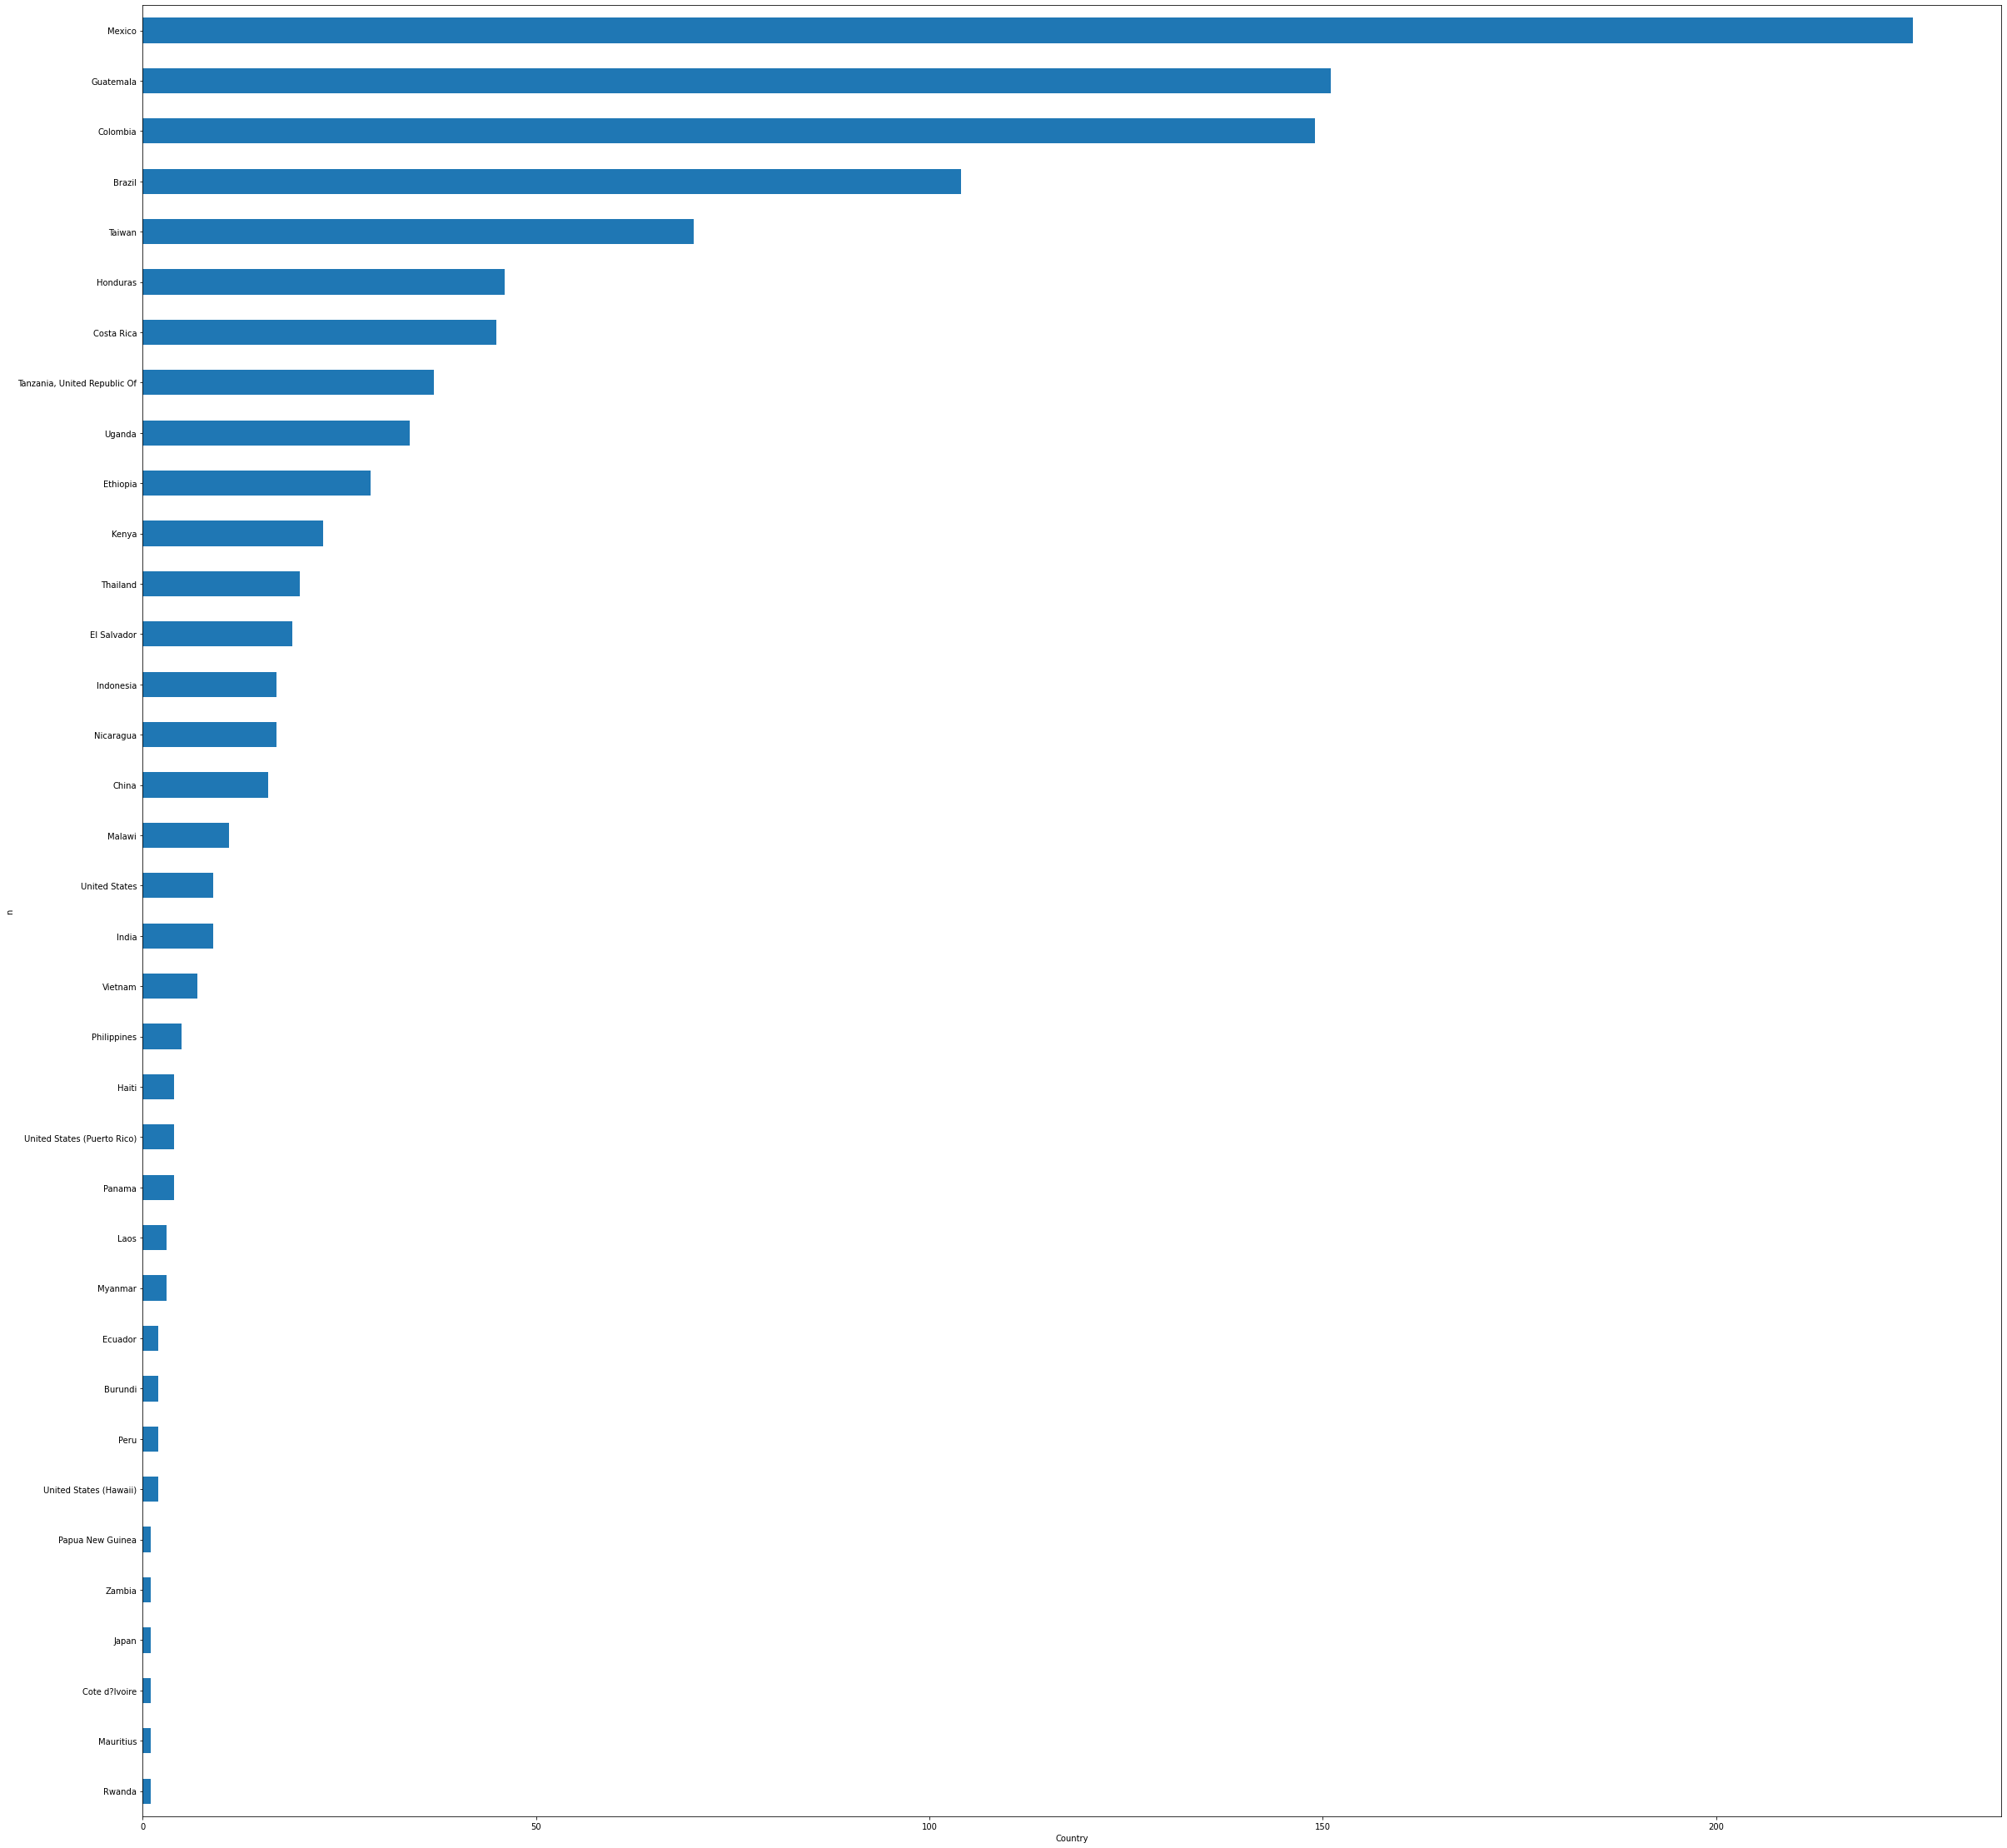

In [1669]:
new_df['country']= new_df.loc[:,'Country.of.Origin']
plt.figure(figsize=(40,40))
new_df.country.value_counts().sort_values().plot(kind = 'barh')
plt.xlabel("Country")
plt.ylabel("n")

plt.show()

(<Figure size 540x990 with 1 Axes>, <Axes:>)

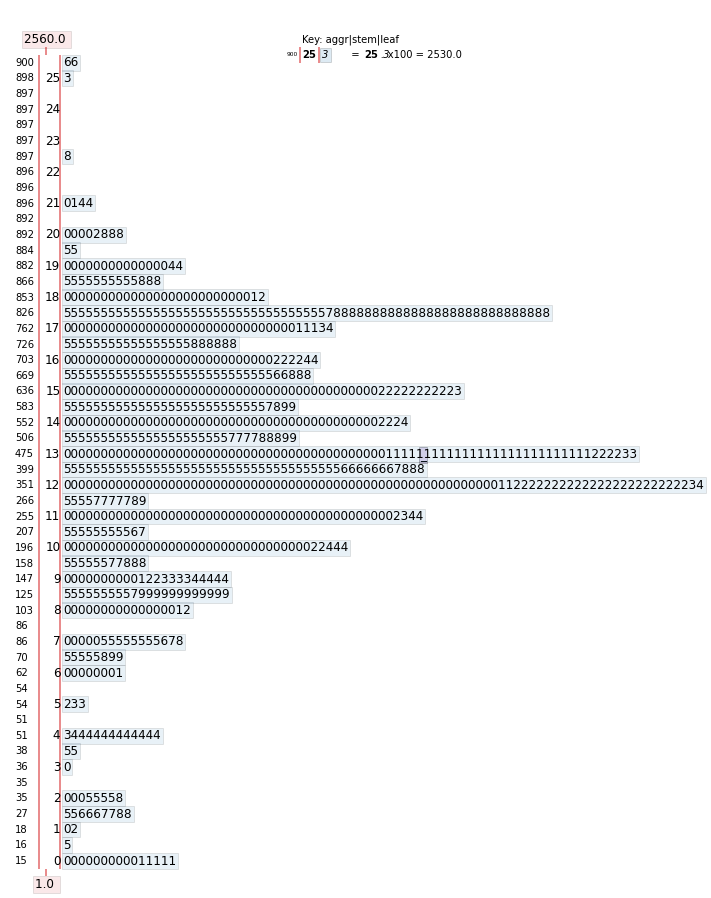

In [1670]:
stemgraphic.stem_graphic(new_df['altitude_mean_meters'])

(<Figure size 540x612 with 1 Axes>, <Axes:>)

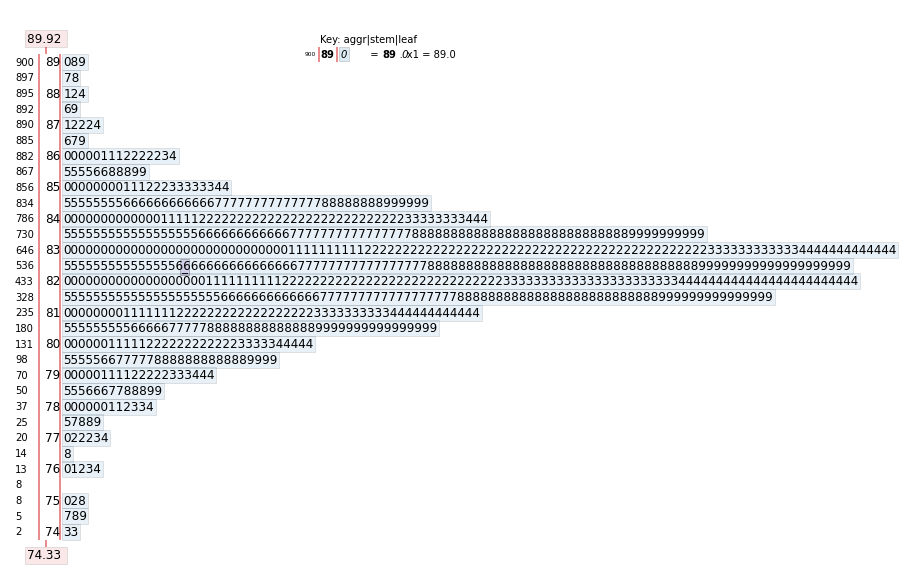

In [1671]:
stemgraphic.stem_graphic(new_df['Total.Cup.Points'])

C:\Users\witta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


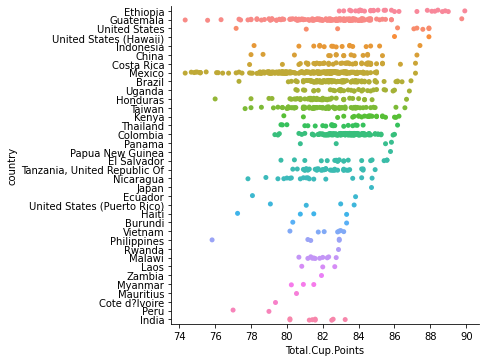

In [1672]:
try:
    sns.catplot(point,new_df['country'],data=new_df)
except ValueError:
    plt.show()

In [1673]:
point = pd.to_numeric(point) 
print(point)

# Mean of point
myMean = point.mean()
print(myMean)

# degrees of freedom (dgf) = samplesize - 1 
n = len(point) 
print(n)
dgf = n-1

# Standard error (SE)
SE = sem(point)
print(SE)

#Confidence Interval (CI) 90% 95% 99%
CIlist = [0.90 , 0.95 , 0.99]
print(t.interval(CIlist[0],dgf,loc=myMean,scale= SE ))
print(t.interval(CIlist[1],dgf,loc=myMean,scale= SE ))
print(t.interval(CIlist[2],dgf,loc=myMean,scale= SE ))  

def getCI(cl,dgf,mean,se) :
    return t.interval(cl,dgf,loc=mean,scale=se)






1       89.92
2       89.75
3       89.00
4       88.83
7       88.67
        ...  
1327    80.50
1328    80.17
1329    80.17
1332    78.08
1333    77.17
Name: Total.Cup.Points, Length: 1075, dtype: float64
82.37144186046513
1075
0.06452958713015947
(82.26520850227269, 82.47767521865757)
(82.24482350156332, 82.49806021936693)
(82.2049287611408, 82.53795495978945)


In [1674]:


alpha = [1-CIlist[0],1-CIlist[1],1-CIlist[2] ]
print(alpha)

myT = [t.ppf(alpha[0]/2,dgf,loc=0, scale = 1),t.ppf(alpha[1]/2,dgf,loc=0, scale = 1),t.ppf(alpha[2]/2,dgf,loc=0, scale = 1)]
print(myT)

#margin of error
ME = [myT[0] * SE, myT[1] * SE,myT[2] * SE]

print(ME)


[0.09999999999999998, 0.050000000000000044, 0.010000000000000009]
[-1.6462736384498693, -1.9621752522049924, -2.580414763672022]
[-0.10623335819243548, -0.12661835890180467, -0.16651309932432357]


In [1675]:

LCL90 = myMean + ME[0]
UCL90 = myMean - ME[0]
print(LCL90,UCL90) 

82.26520850227269 82.47767521865757


In [1676]:
LCL95 = myMean + ME[1]
UCL95 = myMean - ME[1]

print(LCL95,UCL95)

82.24482350156332 82.49806021936693


In [1677]:
LCL99 = myMean + ME[2]
UCL99 = myMean - ME[2]

print(LCL99,UCL99)

82.2049287611408 82.53795495978945


C:\Users\witta\AppData\Local\Temp/ipykernel_12056/2182286462.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='blue')


([<matplotlib.axis.YTick at 0x24727cea460>,
 [Text(0, 0, '99% confidence level'),
  Text(0, 1, '95% confidence level'),
  Text(0, 2, '90% confidence level')])

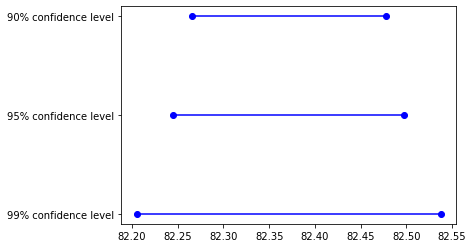

In [1696]:
data_dict = {}
data_dict['category'] = ['99% confidence level','95% confidence level','90% confidence level']
data_dict['lower'] = [LCL99,LCL95,LCL90]
data_dict['upper'] = [UCL99,UCL95,UCL90]
dataset = pd.DataFrame(data_dict)
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='blue')
plt.yticks(range(len(dataset)),list(dataset['category']))

In [1679]:



# CI  
arr = [] 
for i in range(50):
    df_point = df.sample(n=50)
    point2 = df_point.loc[:,'Total.Cup.Points']
    myMean1 = point2
    size = len(point2)
    dgf = size-1 
    SE1 = sem(point2)
    arr.append(getCI(CIlist[0],dgf,myMean,SE1))   

print(arr) 

     
      
    

[(81.85869903977041, 82.88418468115984), (81.7126409028677, 83.03024281806255), (81.80629612060078, 82.93658760032947), (81.5158676335098, 83.22701608742045), (81.8748143232429, 82.86806939768735), (81.93644275602617, 82.80644096490408), (81.53771003464873, 83.20517368628153), (81.58503207650759, 83.15785164442266), (81.78630545268818, 82.95657826824207), (81.8966450038089, 82.84623871712135), (81.65042213937751, 83.09246158155274), (81.97987109980522, 82.76301262112503), (81.79395106891991, 82.94893265201034), (81.75253015247701, 82.99035356845324), (81.79092678701852, 82.95195693391173), (81.4815199256529, 83.26136379527735), (81.50242247873682, 83.24046124219343), (81.72768046113578, 83.01520325979448), (81.76378642866399, 82.97909729226626), (81.93898686471942, 82.80389685621083), (81.53320717826792, 83.20967654266234), (81.85822639707109, 82.88465732385916), (81.90390466574985, 82.8389790551804), (81.95627986145274, 82.78660385947751), (81.43252738527677, 83.31035633565348), (81.8

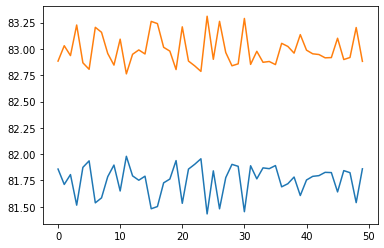

In [1680]:
plt.plot(arr)

0       2075.0
1       2075.0
2       1700.0
3       2000.0
4       2075.0
         ...  
1328     750.0
1329     750.0
1330    3000.0
1332      40.0
1333     795.0
Name: altitude_mean_meters, Length: 1106, dtype: float64


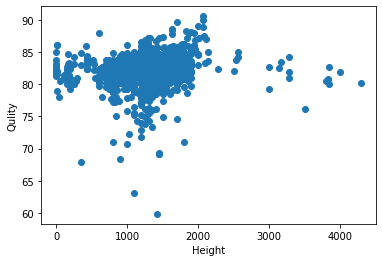

In [1681]:

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#df_height = df[['altitude_mean_meters']]
df_height = df['altitude_mean_meters'] 
df_point = df['Total.Cup.Points']
mean = df_point.mean().sum()
plt.scatter(df_height,df_point) 
plt.xlabel("Height")
plt.ylabel("Qulity")

print(df_height)


In [1682]:

model = LinearRegression() # creat object
x=df[['altitude_mean_meters']] # expect 2D array not Series (1D)
y=df['Total.Cup.Points'] 

model.fit(x, y)
model.score(x, y)


0.022922923589222655

In [1683]:
model.intercept_

81.09753094876508

In [1684]:
model.coef_

array([0.0008178])

In [1685]:
predictions = model.predict(x)  
predictions

array([82.79446656, 82.79446656, 82.48779145, ..., 83.55093183,
       81.13024296, 81.74768218])

Text(0, 0.5, 'Qulity')

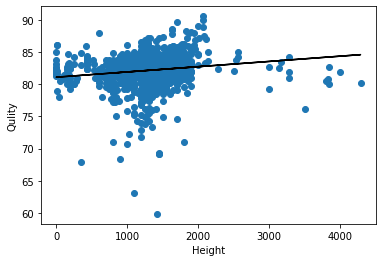

In [1686]:
plt.scatter(x,y)
plt.plot(x,predictions,color='black')
plt.xlabel("Height")
plt.ylabel("Qulity")


In [1687]:

df_countrys = new_df.groupby(df['Country.of.Origin'])
df_ethiopia = df_countrys.get_group('Ethiopia')    
df_mexico = df_countrys.get_group('Mexico') 
df_brazil = df_countrys.get_group('Brazil') 
df_colombia = df_countrys.get_group('Colombia')
df_thailand = df_countrys.get_group('Thailand') 




0.10762366453895167

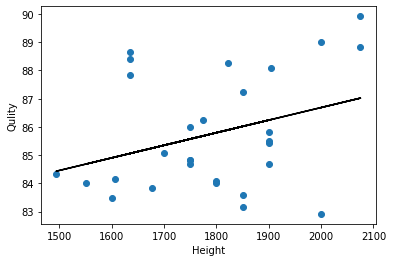

In [1688]:
#Ethiopia 
df_ethiopia = df_countrys.get_group('Ethiopia')   
x = df_ethiopia[['altitude_mean_meters']] 
y = df_ethiopia['Total.Cup.Points'] 
model.fit(x, y)
model.intercept_
model.coef_
predictions = model.predict(x)  
predictions
plt.scatter(x,y)
plt.plot(x,predictions,color='black')
plt.xlabel("Height")
plt.ylabel("Qulity")
model.score(x,y)

0.00010131220835307708

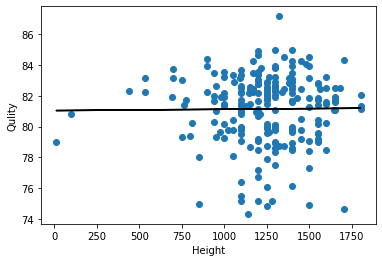

In [1689]:
#Mexico

x = df_mexico[['altitude_mean_meters']] 
y = df_mexico['Total.Cup.Points'] 
model.fit(x, y)
model.intercept_
model.coef_
predictions = model.predict(x)  
predictions
plt.scatter(x,y)
plt.plot(x,predictions,color='black')
plt.xlabel("Height")
plt.ylabel("Qulity")
model.score(x,y)

0.0015525467014797512

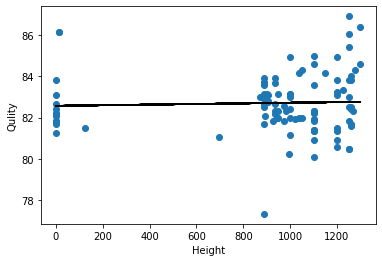

In [1690]:
#Brazil

x = df_brazil[['altitude_mean_meters']] 
y = df_brazil['Total.Cup.Points'] 
model.fit(x, y)
model.intercept_
model.coef_
predictions = model.predict(x)  
predictions
plt.scatter(x,y)
plt.plot(x,predictions,color='black')
plt.xlabel("Height")
plt.ylabel("Qulity")
model.score(x,y)


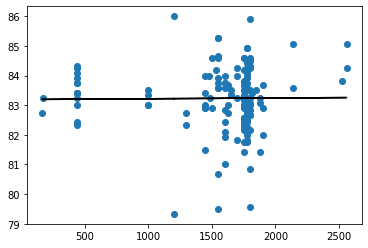

In [1691]:
#Colombia

x = df_colombia[['altitude_mean_meters']] 
y = df_colombia['Total.Cup.Points'] 
model.fit(x, y)
model.intercept_
model.coef_
predictions = model.predict(x)  
predictions
plt.scatter(x,y)
plt.plot(x,predictions,color='black')

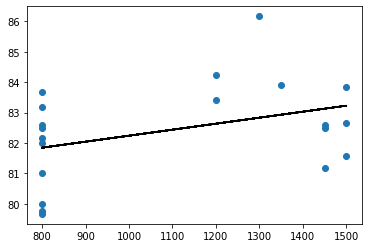

In [1692]:
#Thailand

x = df_thailand[['altitude_mean_meters']] 
y = df_thailand['Total.Cup.Points'] 
model.fit(x, y)
model.intercept_
model.coef_
predictions = model.predict(x)  
predictions
plt.scatter(x,y)
plt.plot(x,predictions,color='black')